#Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import json
from functools import reduce
import matplotlib.pyplot as plt
import shutil
import seaborn as sns
import numpy as np

#Uniformazione e unione delle tabelle relative alle diverse stazioni

Creazione di un'intestazione unica

In [ ]:
# Percorso alla cartella contenente i file CSV
cartella = "/content/drive/MyDrive/dataset"  # Modifica il percorso se necessario

# Set per memorizzare le colonne univoche
colonne_uniche = set()

# Scorri tutti i file nella cartella
for file in os.listdir(cartella):
    if file.endswith(".csv"):  # Controlla che sia un file CSV
        file_path = os.path.join(cartella, file)

        # Leggi solo l'intestazione del file
        print(f"Analizzando le colonne del file: {file}")
        df = pd.read_csv(file_path, nrows=0)

        # Aggiungi le colonne al set
        colonne_uniche.update(df.columns)

# Ordina le colonne uniche in ordine alfabetico (opzionale)
colonne_finali = sorted(colonne_uniche)

# Crea un dataframe vuoto con solo l'intestazione
df_intestazione = pd.DataFrame(columns=colonne_finali)

# Salva il nuovo file CSV con solo l'intestazione
output_path = "/content/drive/MyDrive/intestazione_unita.csv"
df_intestazione.to_csv(output_path, index=False)

print(f"File creato con successo: {output_path}")
print(f"Intestazione finale: {colonne_finali}")

Applicazione della nuova intestazione a tutte le tabelle (aggiungendo quelle mancanti quando necessario)

In [ ]:
# Percorso alla cartella contenente i file CSV
cartella = "/content/drive/MyDrive/dataset"  # Modifica il percorso se necessario
intestazione_file = "/content/drive/MyDrive/intestazione_unita.csv"  # Percorso del file con l'intestazione unita

# Leggi l'intestazione unita
intestazione_unita = pd.read_csv(intestazione_file, nrows=0).columns.tolist()

# Percorso per salvare i file aggiornati
cartella_output = "/content/drive/MyDrive/dataset_uniformati"
os.makedirs(cartella_output, exist_ok=True)

# Scorri tutti i file nella cartella
for file in os.listdir(cartella):
    if file.endswith(".csv"):  # Controlla che sia un file CSV
        file_path = os.path.join(cartella, file)

        # Leggi il file
        df = pd.read_csv(file_path)

        # Aggiungi le colonne mancanti con valore vuoto (NaN)
        for col in intestazione_unita:
            if col not in df.columns:
                df[col] = pd.NA

        # Riordina le colonne secondo l'intestazione unita
        df = df[intestazione_unita]

        # Salva il file aggiornato
        file_output_path = os.path.join(cartella_output, file)
        df.to_csv(file_output_path, index=False)

print("Tutti i file sono stati uniformati e salvati nella cartella:", cartella_output)

Aggiunta della colonna file_name a tutte le tabelle. Questo nuovo campo contiene il nome della tabella (stazione di rilevamento) a cui appartiene il record.

In [ ]:
# Percorso alla cartella contenente i file CSV
cartella = "/content/drive/MyDrive/dataset_uniformati"  # Modifica il percorso alla cartella corretta

# Scorri tutti i file nella cartella
for file in os.listdir(cartella):
    if file.endswith(".csv"):  # Controlla che sia un file CSV
        file_path = os.path.join(cartella, file)

        # Leggi il CSV
        df = pd.read_csv(file_path)

        # Rimuovi l'estensione '.csv' dal nome del file
        file_name_without_extension = os.path.splitext(file)[0]

        # Aggiungi la colonna 'file_name' come prima colonna
        df.insert(0, 'file_name', file_name_without_extension)

        # Sovrascrivi il file originale con il dataframe aggiornato
        df.to_csv(file_path, index=False)

print("Tutti i file sono stati aggiornati con la colonna 'file_name'.")

Unione delle tabelle con le misurazioni

In [ ]:
dataset_path = '/content/drive/MyDrive/dataset_delhi'
output_file = '/content/drive/MyDrive/dataset_completo_delhi.csv'
header = ['file_name', 'AT ()', 'AT (degree C)', 'AT (degree)', 'AT (ug/m3)', 'BP ()', 'BP (W/mt2)', 'BP (mg/m3)',
          'BP (mmHg)', 'BP (mmHg).1', 'BP (mmHg).2', 'BP (mmHg).3', 'BP (mmHg).4', 'BP (mmHg).5', 'BP (mmHg).6',
          'BP (mmHg).7', 'Benzene ()', 'Benzene (mg/m3)', 'Benzene (ug/m3)', 'CH4 ()', 'CH4 (ug/m3)', 'CO (mg/Nm3)',
          'CO (mg/m3)', 'CO (ng/m3)', 'CO (ug/m3)', 'CO2 (mg/m3)', 'Eth-Benzene ()', 'Eth-Benzene (ug/m3)', 'From Date',
          'Gust (kl/h)', 'Gust (km/hr)', 'Gust (m/s)', 'HCHO (ug/m3)', 'Hg (ug/m3)', 'MH (m)', 'MP-Xylene ()',
          'MP-Xylene (ug/m3)', 'NH3 ()', 'NH3 (ppb)', 'NH3 (ug/m3)', 'NMHC ()', 'NMHC (ug/m3)', 'NO ()', 'NO (mg/m3)',
          'NO (ppb)', 'NO (ppm)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NOx (ppm)', 'NOx (ug/m3)',
          'O Xylene (ug/m3)', 'Ozone ()', 'Ozone (ppb)', 'Ozone (ug/m3)', 'PM10 (ug/m3)', 'PM2.5 (ug/m3)', 'Power (W)',
          'RF ()', 'RF (m/s)', 'RF (mm)', 'RF (mm).1', 'RF (mm).2', 'RF (mm).3', 'RF (mm).4', 'RF (mm).5', 'RF (mm).6',
          'RF (mm).7', 'RH (%)', 'RH ()', 'RH (W/mt2)', 'RH (degree)', 'SO2 ()', 'SO2 (ug/m3)', 'SPM (ug/m3)', 'SR ()',
          'SR (W/mt2)', 'SR (ug/m3)', 'THC ()', 'THC (ug/m3)', 'Temp ()', 'Temp (degree C)', 'Temp (ug/m3)', 'To Date',
          'Toluene ()', 'Toluene (ug/m3)', 'VWS (degree)', 'VWS (m/s)', 'Variance (n)', 'WD ()', 'WD (deg)',
          'WD (degree C)', 'WD (degree)', 'WS ()', 'WS (m/s)', 'WS (ug/m3)', 'Xylene ()', 'Xylene (ug/m3)']

# Lista di tutti i file CSV
file_csv = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]

# Scrive l'intestazione una sola volta
with open(output_file, 'w') as out_file:
    pd.DataFrame(columns=header).to_csv(out_file, index=False)  # Crea il file con l'intestazione

# Leggi e scrivi ogni file CSV
for file in file_csv:
    file_path = os.path.join(dataset_path, file)
    try:
        for chunk in pd.read_csv(file_path, chunksize=100000):  # Usa chunksize per ridurre l'uso della memoria
            # Scrive nel file di output senza intestazione
            chunk.to_csv(output_file, mode='a', header=False, index=False)
    except Exception as e:
        print(f"Errore nel file {file}: {e}")

#Definizione di funzioni di utilità

Definizione di una serie di funzioni di utilità per il calcolo e la rappresentazione della percentuale dei missing values per sostanza

In [ ]:
def calculate_missing_rate(dataframe, fields):
    """
    Calculates the missing value rate for each column in a list of fields.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.
    - fields (list): List of fields to calculate missing values for.

    Returns:
    - dict: A dictionary with column names as keys and missing value rates as values.
    """
    missing_rate = {field: dataframe[field].isnull().mean() * 100 for field in fields}
    return missing_rate

def crea_istogramma_orizzontale(dati, titolo="Istogramma", colore='skyblue', bordo='black', label_valori="Valori", label_categorie="Categorie",
                                x_ticks_fontsize=12, y_ticks_fontsize=12):
    """
    Crea un istogramma orizzontale ordinato in base ai valori del dizionario fornito.

    Parametri:
    - dati (dict): Un dizionario con categorie come chiavi e valori numerici come valori.
    - titolo (str): Il titolo del grafico (default: "Istogramma Orizzontale").
    - colore (str): Colore delle barre (default: 'skyblue').
    - bordo (str): Colore del bordo delle barre (default: 'black').

    Output:
    - Mostra un grafico con l'istogramma orizzontale ordinato.
    """
    # Ordina il dizionario in base ai valori
    sorted_data = dict(sorted(dati.items(), key=lambda item: item[1], reverse=True))

    # Estrai chiavi (etichette) e valori
    labels = list(sorted_data.keys())
    values = list(sorted_data.values())

    # Crea l'istogramma orizzontale
    plt.figure(figsize=(10, 6))
    plt.barh(labels, values, color=colore, edgecolor=bordo)

    # Aggiungi etichette e titolo
    plt.xlabel(label_valori, fontsize=14)
    plt.ylabel(label_categorie, fontsize=14)
    plt.title(titolo, fontsize=16)
    plt.xticks(fontsize=x_ticks_fontsize)
    plt.yticks(fontsize=y_ticks_fontsize)

    # Aggiungi valori accanto alle barre
    for i, v in enumerate(values):
        plt.text(v + 1, i, f"{v:.1f}", va='center', fontsize=10)

    # Mostra il grafico
    plt.tight_layout()
    plt.show()

Definizione di una funzione per l'eliminazione di una colonna utilizzando i chunk per consumare meno RAM

In [ ]:
def drop_column(input_file, output_file, colonne_da_rimuovere, chunk_size = 100000):

  # Usa pd.read_csv con chunksize
  chunk_iter = pd.read_csv(input_file, chunksize=chunk_size)

  # Scrivi il file di output
  for i, chunk in enumerate(chunk_iter):
      # Droppa le colonne indesiderate
      chunk = chunk.drop(columns=colonne_da_rimuovere)

      # Scrivi il chunk nel file di output
      if i == 0:
          chunk.to_csv(output_file, index=False)  # Scrivi l'header solo nel primo chunk
      else:
          chunk.to_csv(output_file, mode='a', header=False, index=False)  # Append senza header

Definizione di due funzioni di utilità per il filtraggio

In [ ]:
def filtra_colonna_per_lista_valori(input_file, output_file, colonna, valori_ammessi, chunk_size = 100000):
  # Lista per raccogliere i risultati filtrati
  risultati = []

  # Leggi il file CSV in chunk
  for chunk in pd.read_csv(input_file, chunksize=chunk_size):

      # Filtra i dati nel chunk
      chunk_filtrato = chunk[chunk[colonna].isin(valori_ammessi)]
      # Aggiungi i dati filtrati alla lista
      risultati.append(chunk_filtrato)

  # Combina tutti i chunk filtrati in un unico DataFrame
  df_filtrato = pd.concat(risultati, ignore_index=True)

  # Salva il risultato in un nuovo file CSV
  df_filtrato.to_csv(output_file, index=False)


def filtra_per_data_acquisizione(input_file, output_file, anno_min, chunk_size = 100000):
  # Lista per raccogliere i risultati filtrati
  risultati = []

  # Leggi il file CSV in chunk
  for chunk in pd.read_csv(input_file, chunksize=chunk_size):

      # Assicurati che la colonna sia in formato datetime
      chunk['From Date'] = pd.to_datetime(chunk['From Date'])
      # Filtra i dati nel chunk
      chunk_filtrato = chunk[chunk['From Date'].dt.year >= anno_min]
      # Aggiungi i dati filtrati alla lista
      risultati.append(chunk_filtrato)

  # Combina tutti i chunk filtrati in un unico DataFrame
  df_filtrato = pd.concat(risultati, ignore_index=True)

  # Salva il risultato in un nuovo file CSV
  df_filtrato.to_csv(output_file, index=False)

Definizione di una funzione che stampa una tabella con la percentuale di missing value per gruppo

In [ ]:
def plot_missing_values_heatmap(dataframe, group_field, fields=None, figsize=(8, 6), cmap="coolwarm"):
    """
    Plots a heatmap of the percentage of missing values by group.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.
    - group_field (str): The field to group by (e.g., 'file_name').
    - fields (list, optional): List of fields to calculate missing values for. If None, all fields are used.
    - figsize (tuple, optional): Size of the figure (default: (8, 6)).
    - cmap (str, optional): Color map for the heatmap (default: 'coolwarm').

    Returns:
    - None
    """
    # Filter fields if provided
    if fields:
        dataframe = dataframe[[group_field] + fields]

    # Calculate percentage of missing values
    missing_table = (
        dataframe.groupby(group_field)
        .apply(lambda group: group.isnull().mean() * 100)
    )

    # Plot the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(
        missing_table,
        annot=True,          # Show values in each cell
        fmt=".2f",           # Format percentages
        cmap=cmap,           # Color map
        cbar_kws={'label': '% Missing'},  # Color bar label
        linewidths=0.5,      # Line width between cells
        yticklabels=True
    )

    # Title and labels
    plt.title('Percentage of Missing Values by Group', fontsize=16)
    plt.xlabel('Fields', fontsize=12)
    plt.ylabel('Groups', fontsize=12)
    plt.xticks(fontsize=8)
    plt.yticks(rotation=0, fontsize=8)

    # Show the plot
    plt.tight_layout(rect=[0,0,2,2])
    plt.show()

#Conversione delle unità di misura e filtraggio dei campi e delle stazioni

Eliminazione delle sostanze per tenere solo gli inquinanti principali, quali:
*   Particolato (PM10 e PM2.5)
*   Ossidi di azoto (NO, NO2)
*   Monossido di carbonio (CO)
*   Biossido di zolfo (SO₂)
*   Ozono troposferico (O₃)

In [ ]:
sostanze_da_rimuovere=['Benzene ()', 'Benzene (mg/m3)', 'Benzene (ug/m3)', 'CH4 ()', 'CH4 (ug/m3)', 'CO2 (mg/m3)', 'Eth-Benzene ()', 'Eth-Benzene (ug/m3)', 'HCHO (ug/m3)', 'Hg (ug/m3)', 'MP-Xylene ()', 'MP-Xylene (ug/m3)', 'NH3 ()', 'NH3 (ppb)', 'NH3 (ug/m3)', 'NMHC ()', 'NMHC (ug/m3)', 'O Xylene (ug/m3)', 'Toluene ()', 'Toluene (ug/m3)', 'Variance (n)', 'Xylene ()', 'Xylene (ug/m3)']
drop_column('/content/drive/MyDrive/dataset_completo.csv', '/content/drive/MyDrive/dataset_completo_filtrato.csv', sostanze_da_rimuovere, chunk_size = 100000)

Conversione delle unità di misura delle sostanze selezionate e delle condizioni atmosferiche

In [ ]:
# Funzione per convertire da ppb a µg/m³
def convert_ppb_to_ugm3(ppb, bp, at):
    PM = 46  # g/mol
    if pd.isna(ppb) or pd.isna(bp) or pd.isna(at):
        return None
    return ppb * (PM / 24.45) * (bp / 1013) * (273 / (at + 273.15))

In [ ]:
# Percorsi dei file
input_file = '/content/drive/MyDrive/dataset_completo_filtrato.csv'
output_file = '/content/drive/MyDrive/dataset_completo_convertito.csv'

# Dimensione del chunk
chunksize = 100000  # Numero di righe per ogni chunk

# Apri un file di output per scrivere i risultati
with open(output_file, 'w') as f_out:
    for i, chunk in enumerate(pd.read_csv(input_file, chunksize=chunksize)):
        # Elaborazione del chunk
        chunk['AT (degree C)'] = chunk['AT (degree C)'].combine_first(chunk['AT ()'])
        chunk['BP (mmHg)'] = chunk['BP (mmHg)'].combine_first(chunk['BP ()'])
        chunk['RH (%)'] = chunk['RH (%)'].combine_first(chunk['RH ()'])
        chunk['SR (W/mt2)'] = chunk['SR (W/mt2)'].combine_first(chunk['SR ()'])
        chunk['SO2 (ug/m3)'] = chunk['SO2 (ug/m3)'].combine_first(chunk['SO2 ()'])
        chunk['WD (deg)'] = chunk['WD (deg)'].combine_first(chunk['WD ()'])
        chunk['WD (deg)'] = chunk['WD (deg)'].combine_first(chunk['WD (degree)'])
        chunk['WS (m/s)'] = chunk['WS (m/s)'].combine_first(chunk['WS ()'])

        # Conversione in mg/m³
        if 'CO (ng/m3)' in chunk.columns:
            chunk['CO (ng/m3)'] = chunk['CO (ng/m3)'] / 1000000  # Converti da ng/m³ a mg/m³
        if 'CO (ug/m3)' in chunk.columns:
            chunk['CO (ug/m3)'] = chunk['CO (ug/m3)'] / 1000  # Converti da µg/m³ a mg/m³

        # Uso di combine_first per unificare le colonne
        chunk['CO (mg/m3)'] = (
            chunk.get('CO (mg/m3)', pd.Series())
            .combine_first(chunk.get('CO (ug/m3)', pd.Series()))
            .combine_first(chunk.get('CO (ng/m3)', pd.Series()))
        )

        # Scrivi il chunk nel file di output
        if i == 0:
            # Scrivi l'intestazione solo per il primo chunk
            chunk.to_csv(f_out, index=False)
        else:
            # Scrivi senza intestazione per i chunk successivi
            chunk.to_csv(f_out, index=False, header=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset_completo_convertito.csv')
print(df.columns)

Eliminazione dei campi divenuti inutili perchè convertiti e di quelli inutilizzabili perchè non convertibili

In [ ]:
#Eliminazione dei campi non più utilizzati
campi_da_rimuovere=[
    'AT ()', 'AT (degree)', 'AT (ug/m3)',
    'BP ()', 'BP (W/mt2)', 'BP (mg/m3)', 'BP (mmHg).1', 'BP (mmHg).2',
    'BP (mmHg).3', 'BP (mmHg).4', 'BP (mmHg).5', 'BP (mmHg).6', 'BP (mmHg).7',
    'CO (mg/Nm3)', 'CO (ng/m3)', 'CO (ug/m3)',
    'Gust (kl/h)', 'Gust (km/hr)', 'Gust (m/s)',
    'MH (m)', 'NO ()', 'NO (mg/m3)', 'NO (ppb)', 'NO (ppm)',
    'NOx (ppb)', 'NOx (ppm)', 'NOx (ug/m3)', 'Ozone ()', 'Ozone (ppb)',
    'Power (W)', 'RF ()', 'RF (m/s)', 'RF (mm).1', 'RF (mm).2',
    'RF (mm).3', 'RF (mm).4', 'RF (mm).5', 'RF (mm).6', 'RF (mm).7',
    'RH ()', 'RH (W/mt2)', 'RH (degree)',
    'SO2 ()', 'SPM (ug/m3)', 'SR ()', 'SR (ug/m3)',
    'THC ()', 'THC (ug/m3)', 'Temp ()', 'Temp (ug/m3)',
    'VWS (degree)', 'WD ()', 'WD (degree C)', 'WD (degree)',
    'WS ()', 'WS (ug/m3)'
]
drop_column('/content/drive/MyDrive/dataset_completo_convertito.csv', '/content/drive/MyDrive/dataset_convertito.csv', campi_da_rimuovere, chunk_size = 100000)

Filtraggio delle migliori tabelle in termini di missing values

In [ ]:
# Specifica il percorso del file e il chunksize
file_path = '/content/drive/MyDrive/dataset_convertito.csv'  # Sostituisci con il tuo file
output_file = '/content/drive/MyDrive/dataset_stazioni_under_10.csv'  # Nome del file filtrato da salvare
chunksize = 100000  # Numero di righe per chunk

# Lista delle colonne da analizzare
colonne_da_controllare = ['CO (mg/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'Ozone (ug/m3)', 'PM10 (ug/m3)', 'PM2.5 (ug/m3)', 'SO2 (ug/m3)']

# Soglia in percentuale per considerare una stazione valida
soglia_percentuale_missing = 10  # Percentuale massima di missing values accettabile

# Dizionario per accumulare i dati dei missing values per stazione e colonna
dati_missing_per_stazione_colonna = {}

# Itera attraverso i chunk per calcolare le percentuali di missing values
for chunk in pd.read_csv(file_path, chunksize=chunksize):
    grouped = chunk.groupby('file_name')[colonne_da_controllare].apply(
        lambda x: x.isnull().sum() / len(x) * 100
    )
    for codice, valori_colonne in grouped.iterrows():
        if codice not in dati_missing_per_stazione_colonna:
            dati_missing_per_stazione_colonna[codice] = {}
        for colonna, percentuale_missing in valori_colonne.items():
            dati_missing_per_stazione_colonna[codice][colonna] = percentuale_missing

# Filtra le stazioni che rispettano la soglia per tutte le colonne
stazioni_valide = {
    codice for codice, colonne in dati_missing_per_stazione_colonna.items()
    if all(percentuale < soglia_percentuale_missing for percentuale in colonne.values())
}

print(stazioni_valide)

# Crea o sovrascrivi il file di output con i dati filtrati
with open(output_file, mode='w', encoding='utf-8', newline='') as f:
    for i, chunk in enumerate(pd.read_csv(file_path, chunksize=chunksize)):
        # Filtra le righe che appartengono alle stazioni valide
        chunk_filtrato = chunk[chunk['file_name'].isin(stazioni_valide)]

        # Scrivi il chunk filtrato nel file di output
        if not chunk_filtrato.empty:
            # Scrivi l'header solo per il primo chunk
            chunk_filtrato.to_csv(f, index=False, header=(i == 0), mode='a')

print(f"File filtrato salvato come {output_file}")

{'RJ010', 'UP021', 'HR025', 'BR005', 'OR008', 'GJ004', 'DL030', 'TG004', 'DL020', 'MP010', 'OR004', 'WB006', 'KA011', 'UP046', 'DL012', 'DL024', 'WB011', 'AS006', 'UP031', 'RJ018', 'RJ001', 'PB003', 'RJ029', 'RJ034', 'HR013', 'DL023', 'DL034', 'DL033', 'UP039', 'TG005', 'HR020', 'RJ013', 'HR009', 'DL036', 'PB001', 'UP055', 'MP021', 'DL035', 'RJ008', 'HR011', 'HR024', 'MP013', 'WB008', 'OR009', 'UP040', 'UP048', 'RJ017', 'AS001', 'MP003', 'DL025', 'HR015', 'MP017', 'MP020', 'TG010', 'TN003', 'UP047', 'DL019', 'UP041', 'HR023', 'HR028', 'RJ012', 'DL038', 'AP004', 'WB013', 'RJ014', 'DL037', 'RJ030', 'DL014', 'RJ007', 'MP019', 'MP012', 'UP044', 'RJ020', 'CH001', 'CG012', 'CG014', 'MP011', 'UP033', 'DL026', 'KA014', 'RJ009', 'UP030', 'DL029', 'TG008', 'RJ004', 'UP035', 'UP043', 'UP032', 'HR019', 'MP018', 'GJ005', 'TN001', 'TN026', 'DL031', 'AP001', 'WB010', 'DL032', 'TR001', 'MP015', 'WB012', 'BR029', 'DL027', 'PY001', 'UP056', 'MP005', 'WB014', 'DL021', 'WB003', 'WB002', 'RJ026', 'HR018', 

Calcolo dei missing values per sostanza e tabella

<ipython-input-6-3a1024b98cee>:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.isnull().mean() * 100)


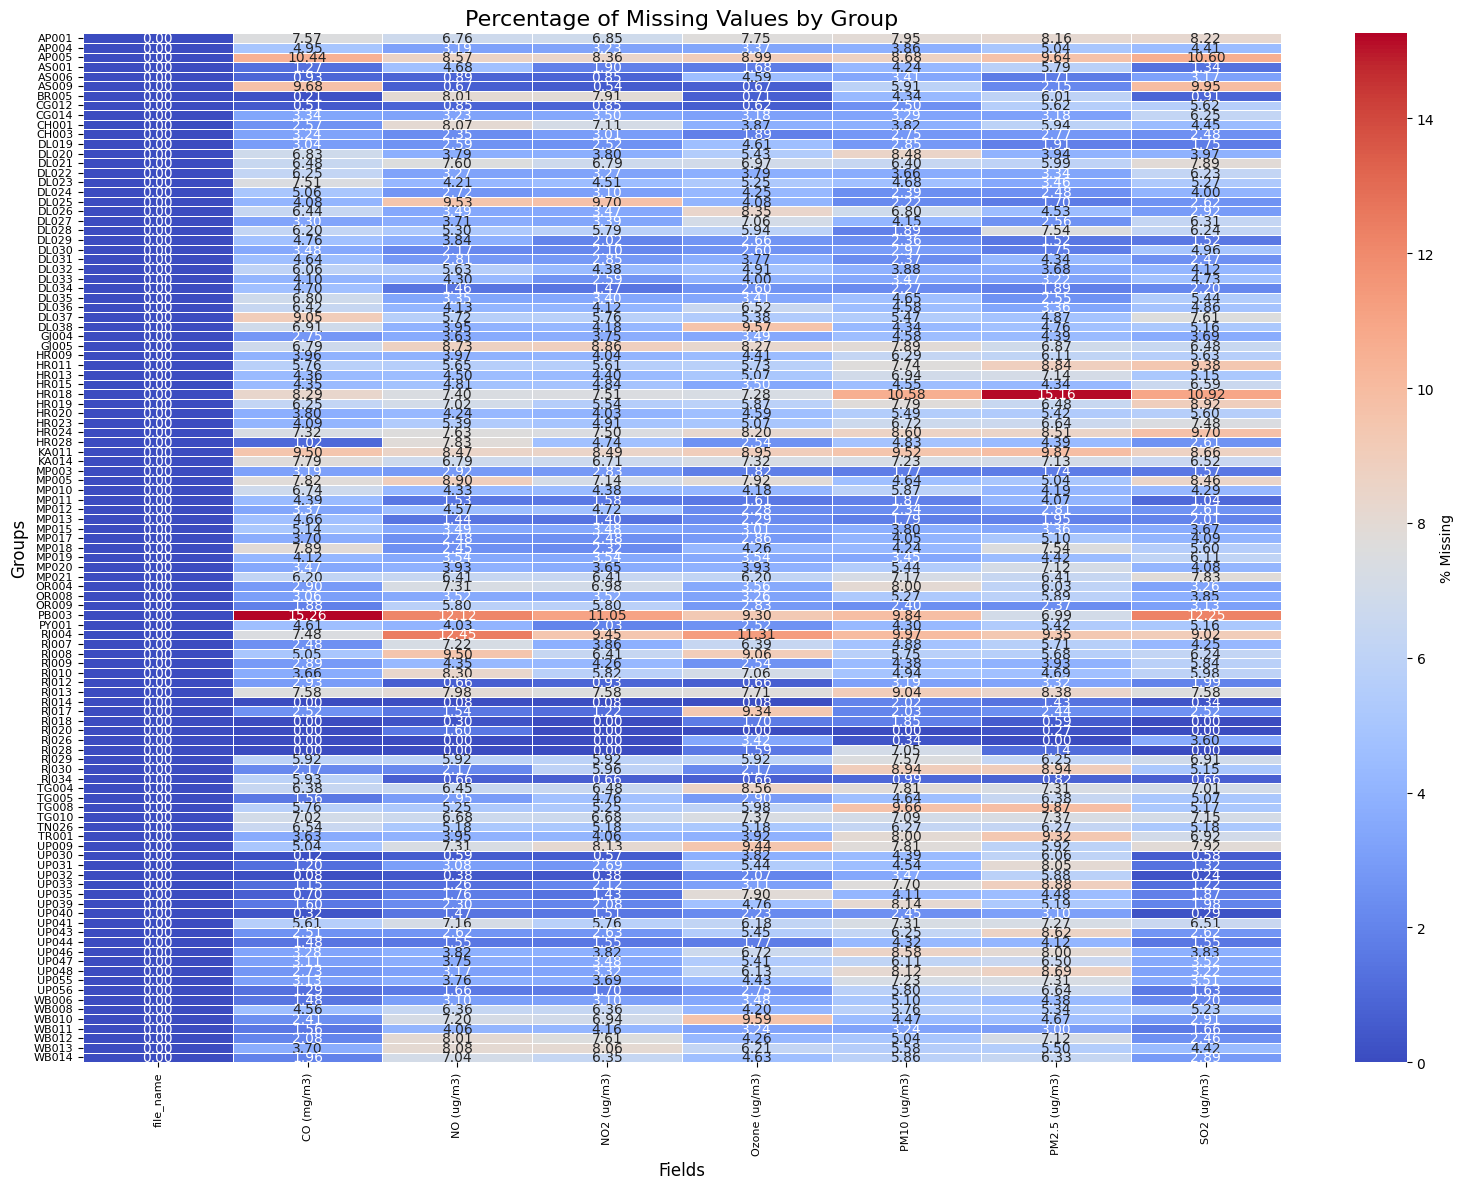

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset_stazioni_under_10.csv')
plot_missing_values_heatmap(df, group_field='file_name', fields=['CO (mg/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'Ozone (ug/m3)', 'PM10 (ug/m3)', 'PM2.5 (ug/m3)', 'SO2 (ug/m3)'])


Calcolo dei missing values per condizione atmosferica e tabella

<ipython-input-6-3a1024b98cee>:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.isnull().mean() * 100)


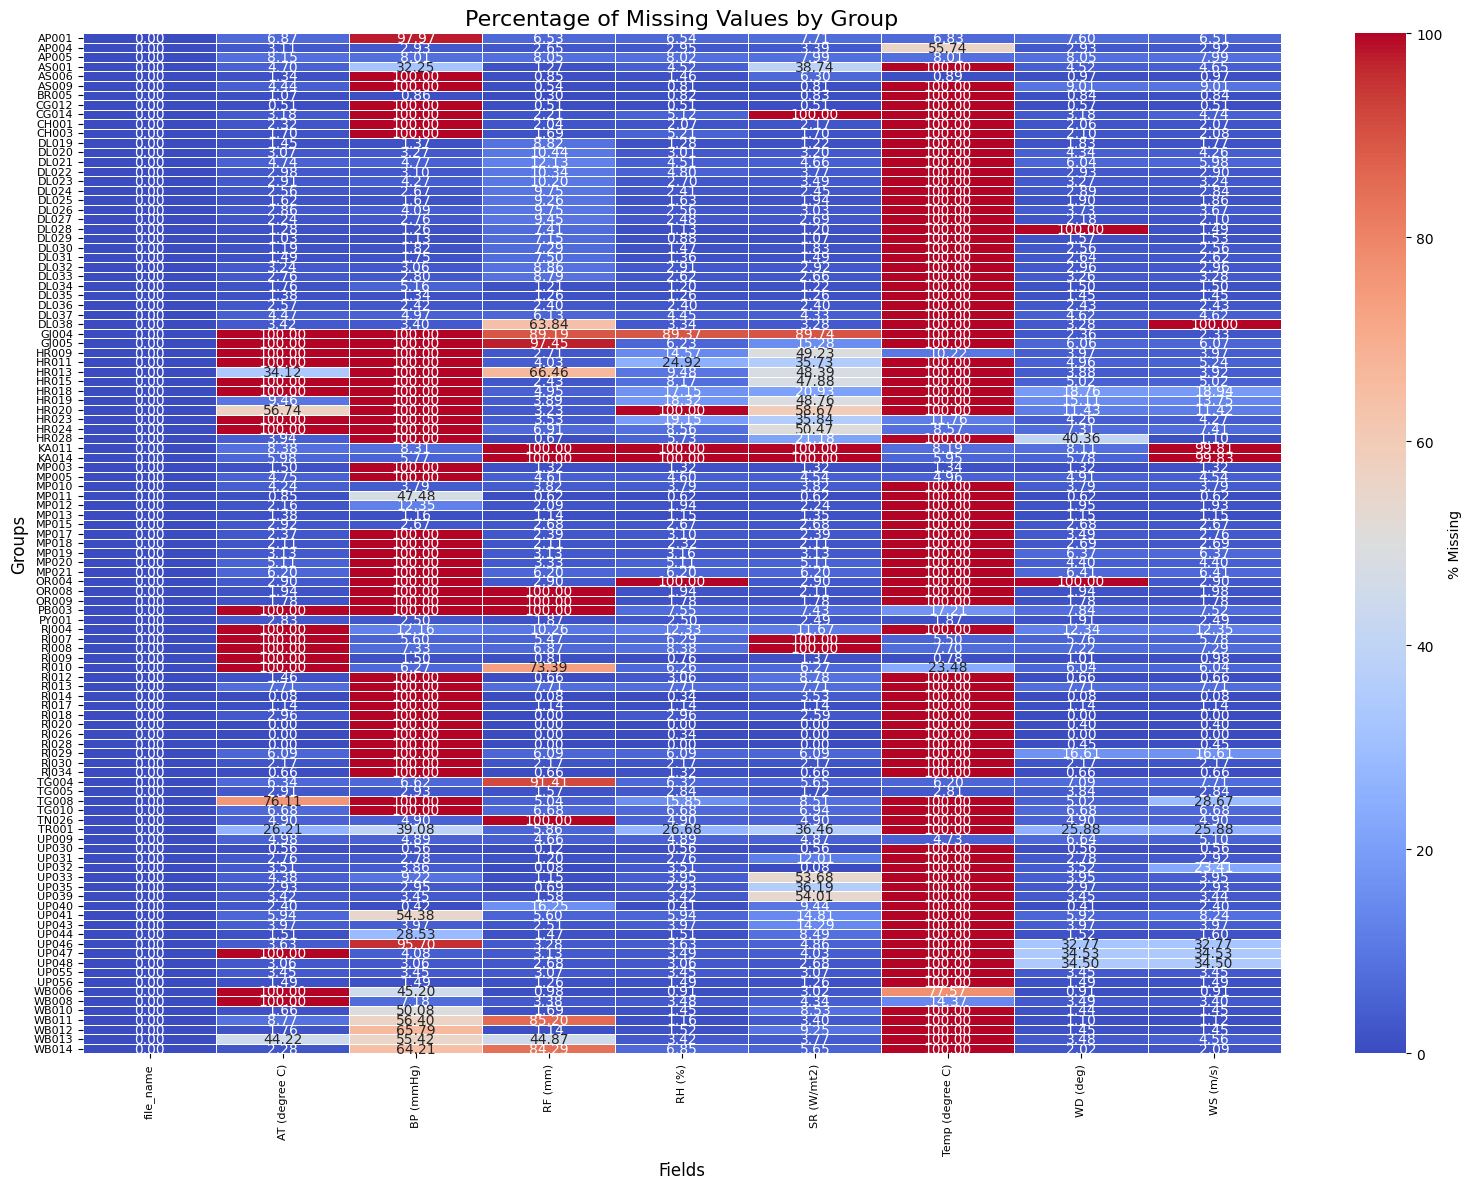

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset_stazioni_under_10.csv')
plot_missing_values_heatmap(df, group_field='file_name', fields=['AT (degree C)','BP (mmHg)','RF (mm)','RH (%)', 'SR (W/mt2)','Temp (degree C)', 'WD (deg)', 'WS (m/s)'])

Eliminazione delle condizioni atmosferiche con troppi missing values

<ipython-input-6-3a1024b98cee>:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.isnull().mean() * 100)


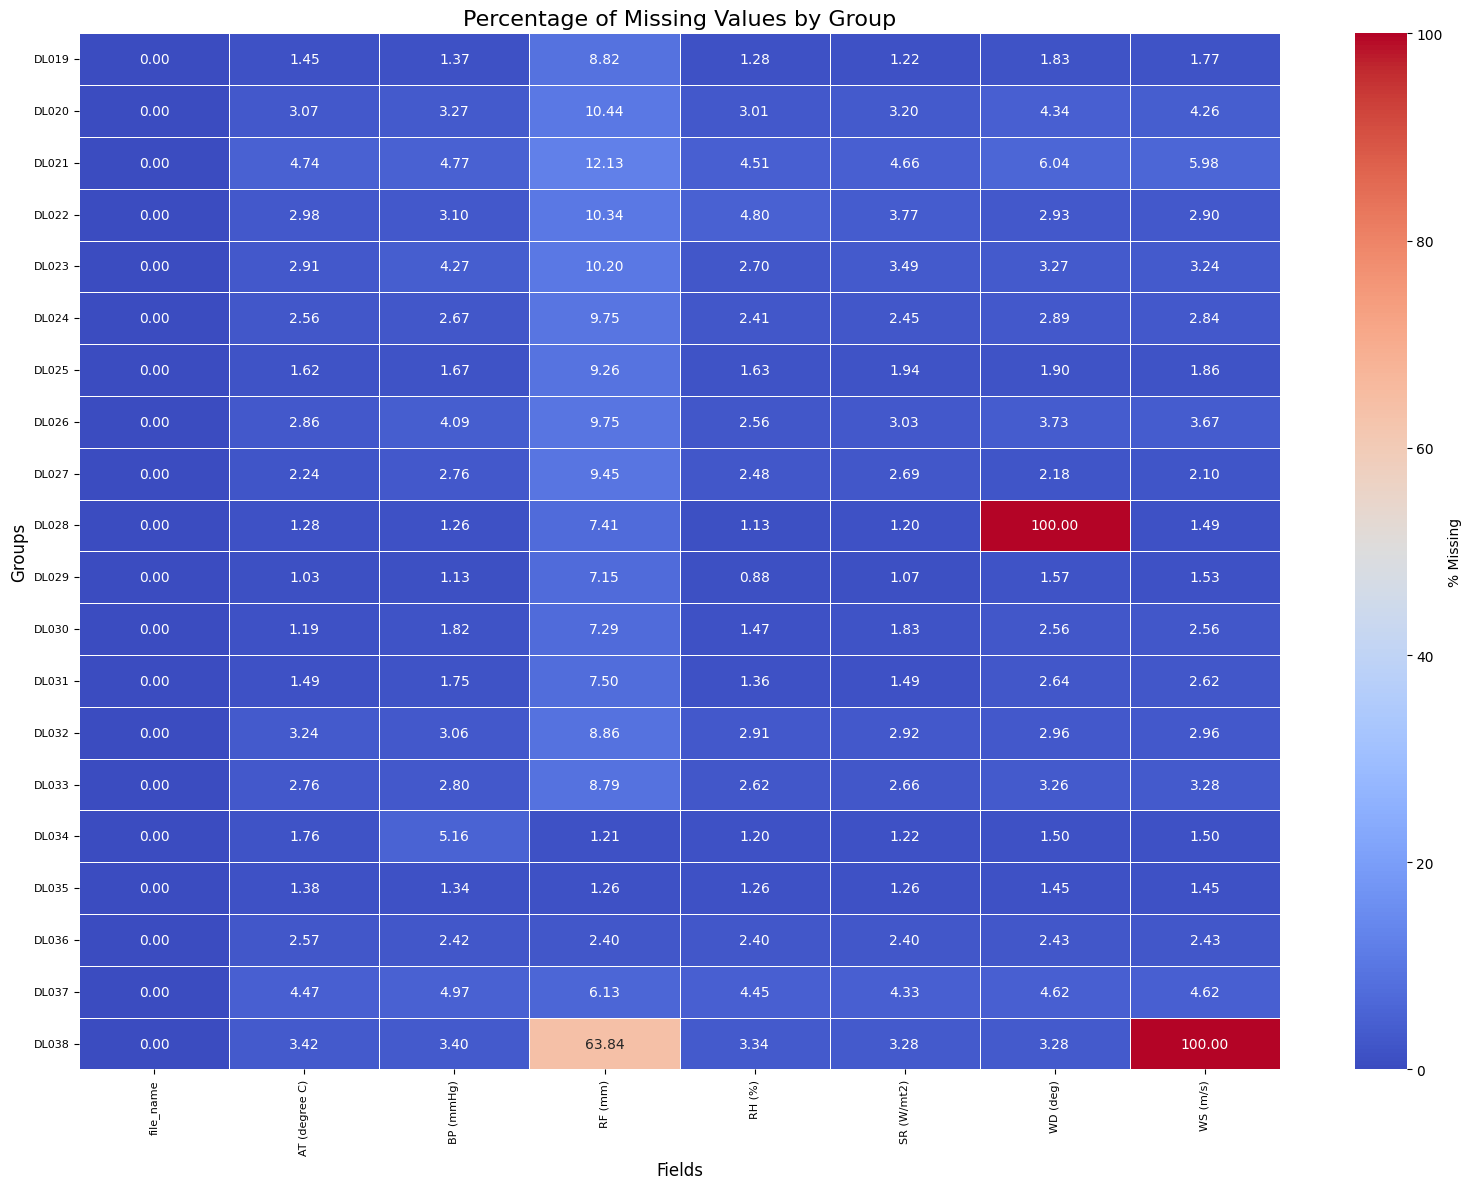

In [ ]:
condizioni_da_rimuovere = ['Temp (degree C)']
drop_column('/content/drive/MyDrive/dataset_stazioni_migliori.csv', '/content/drive/MyDrive/dataset_cond_filtrate.csv', condizioni_da_rimuovere, chunk_size = 100000)
df = pd.read_csv('/content/drive/MyDrive/dataset_cond_filtrate.csv')
df_delhi = df[df['file_name'].str.startswith('DL')]
plot_missing_values_heatmap(df_delhi, group_field='file_name', fields=['AT (degree C)','BP (mmHg)','RF (mm)','RH (%)', 'SR (W/mt2)', 'WD (deg)', 'WS (m/s)'])

#Join tra la tabella con le misurazioni e la tabella station-info

Esecuzione del join tra la tabella con le misurazioni e la tabella contenente le informazioni di ogni stazione di rilevamento

In [ ]:
# File CSV da unire
file_paths = ["/content/drive/MyDrive/dataset_cond_filtrate.csv", "/content/drive/MyDrive/stations_info.csv"]
chunk_size = 100000  # Dimensione del chunk
output_file = "/content/drive/MyDrive/dataset_filtered_and_joined.csv"  # File di output

# Leggi il primo file e scrivilo inizialmente come base
base_file = file_paths[0]
base_iterator = pd.read_csv(base_file, chunksize=chunk_size)

# Scrivi il primo chunk nel file di output
for i, chunk in enumerate(base_iterator):
    if i == 0:
        chunk.to_csv(output_file, index=False)
    else:
        chunk.to_csv(output_file, mode='a', header=False, index=False)

# Esegui il join sugli altri file
for file_path in file_paths[1:]:
    temp_output = "temp.csv"  # File temporaneo
    with pd.read_csv(output_file, chunksize=chunk_size) as base_chunks:
        for base_chunk in base_chunks:
            # Leggi il file successivo in chunk
            file_iterator = pd.read_csv(file_path, chunksize=chunk_size)

            for file_chunk in file_iterator:
                # Esegui il merge dei due chunk
                merged_chunk = pd.merge(base_chunk, file_chunk, on="file_name", how="inner")  # Cambia il tipo di join se necessario

                # Scrivi nel file temporaneo
                with open(temp_output, 'a') as temp:
                    merged_chunk.to_csv(temp, index=False, header=temp.tell() == 0)

    # Sostituisci il file di output con quello temporaneo
    shutil.move(temp_output, output_file)

#Analisi e sostituzione dei missing values

##Analisi e sostituzione dei missing values relativi alle sostanze

###Analisi dei missing values relativi alle sostanze

Analisi della distribuzione dei missing values relativi alle sostanze misurate da tutte le stazioni

In [1]:
df = pd.read_csv('/content/drive/MyDrive/dataset_filtered_and_joined.csv')

# Ordinare il dataframe per stazione e timestamp
df = df.sort_values(by=["file_name", "From Date"]).reset_index(drop=True)

#['CO (mg/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'Ozone (ug/m3)', 'PM10 (ug/m3)', 'PM2.5 (ug/m3)', 'SO2 (ug/m3)']
# Creare una colonna per identificare i valori mancanti
df['is_missing'] = df['SO2 (ug/m3)'].isna()

# Creare un identificatore per gruppi consecutivi di valori mancanti
df['missing_group'] = (df['is_missing'] & ~df['is_missing'].shift(1).fillna(False)).cumsum()

# Calcolare la lunghezza di ogni buco di dati per stazione
missing_lengths = (
    df[df['is_missing']]
    .groupby(['file_name', 'missing_group'])
    .size()
    .reset_index(name='missing_length')
)

# Definire i range delle categorie
bins = [0, 6, 12, 24, 168, 336, np.inf]  # Aggiungere il valore iniziale 0
labels = ["1-6 ore", "7-12 ore", "13-24 ore", "1-7 giorni", "7-14 giorni", "più di due settimane"]

# Classificare i buchi di dati nelle categorie
missing_lengths['category'] = pd.cut(
    missing_lengths['missing_length'], bins=bins, labels=labels, right=False
)

# Contare il numero di buchi per ciascuna categoria
distribution = missing_lengths['category'].value_counts(sort=False).reset_index()
distribution.columns = ['category', 'count']

# Creare l'istogramma
plt.figure(figsize=(10, 6))
plt.bar(distribution['category'], distribution['count'], color='skyblue', edgecolor='black')

# Personalizza griglia e sfondo
ax.set_facecolor(arancione)  # Sfondo del grafico
ax.grid(color=arancione, linestyle='--', linewidth=0.5)  # Colore della griglia

plt.title("Distribuzione delle lunghezze dei buchi di dati", fontsize=16)
plt.xlabel("Estensione dei buchi di dati (righe consecutive)", fontsize=12)
plt.ylabel("Numero di buchi di dati", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

NameError: name 'pd' is not defined

Analisi della variazione giornaliera

Media giornaliera di CO:
       file_name        Date  Daily Mean CO  CO Difference
0          AP001  2016-07-01       0.415833            NaN
1          AP001  2016-07-02       1.108667       0.692833
2          AP001  2016-07-03       0.763333      -0.345333
3          AP001  2016-07-04       0.647368      -0.115965
4          AP001  2016-07-05       0.752083       0.104715
...          ...         ...            ...            ...
123438     WB014  2023-03-27       0.456522       0.144438
123439     WB014  2023-03-28       0.478750       0.022228
123440     WB014  2023-03-29       0.331250      -0.147500
123441     WB014  2023-03-30       0.535000       0.203750
123442     WB014  2023-03-31       0.364167      -0.170833

[123443 rows x 4 columns]


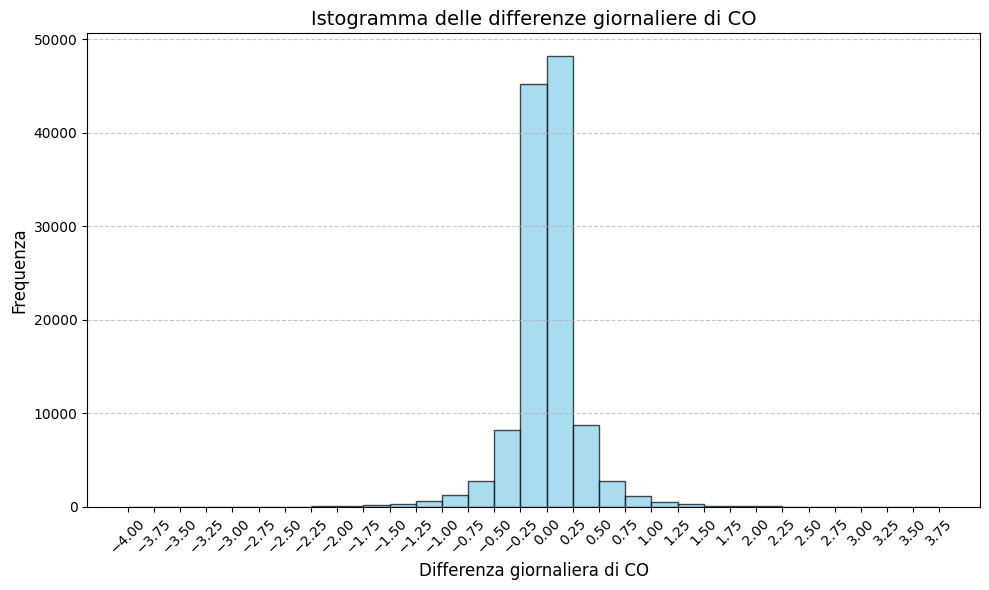

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset_filtered_and_joined.csv')

# Assicurati che la colonna 'From Date' sia in formato datetime
df['From Date'] = pd.to_datetime(df['From Date'])

# Calcolo della media giornaliera di CO
df['Date'] = df['From Date'].dt.date  # Estrai solo la data
daily_mean_df = df.groupby(['file_name', 'Date'])['CO (mg/m3)'].mean().reset_index()
daily_mean_df.rename(columns={'CO (mg/m3)': 'Daily Mean CO'}, inplace=True)

# Calcolo della differenza giornaliera per ogni stazione
daily_mean_df['CO Difference'] = daily_mean_df.groupby('file_name')['Daily Mean CO'].diff()

# Visualizza i risultati
print("Media giornaliera di CO:")
print(daily_mean_df)

# Rimuovi i valori NaN dalla colonna 'CO Difference' (causati dal calcolo della differenza)
daily_mean_df = daily_mean_df.dropna(subset=['CO Difference'])

# Definisci i range per le differenze
bins = np.arange(-4, 4, 0.25)  # Range da -10 a 10 con step di 0.5

# Crea l'istogramma
plt.figure(figsize=(10, 6))
plt.hist(daily_mean_df['CO Difference'], bins=bins, edgecolor='black', color='skyblue', alpha=0.7)
# Etichette e titolo
plt.xlabel('Differenza giornaliera di CO', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.title('Istogramma delle differenze giornaliere di CO', fontsize=14)

# Mostra i range sull'asse x
plt.xticks(bins, rotation=45)

# Mostra l'istogramma
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Valori medi delle sostanze per fasce orarie

In [ ]:
def calculate_means_by_time_range(df, column, time_edges, substance):
    """
    Calcola i valori medi di una colonna per fasce orarie.

    :param df: DataFrame pandas con una colonna 'From Date' e una colonna da analizzare.
    :param column: Nome della colonna per cui calcolare le medie.
    :param time_edges: Lista di orari (in formato 'HH:MM') che definiscono i limiti delle fasce orarie.
    :return: Dizionario con le fasce orarie come chiavi e i valori medi come valori.
    """
    # Assicurati che la colonna 'From Date' sia in formato datetime
    df['From Date'] = pd.to_datetime(df['From Date'])

    # Estrai l'ora dalla colonna 'From Date'
    df['Hour'] = df['From Date'].dt.hour + df['From Date'].dt.minute / 60

    # Creare etichette per le fasce orarie
    labels = [f"{time_edges[i]}-{time_edges[i+1]}" for i in range(len(time_edges)-1)]

    # Creare una colonna con le fasce orarie
    bins = [int(edge.split(':')[0]) + int(edge.split(':')[1])/60 for edge in time_edges]
    df['Time Range'] = pd.cut(df['Hour'], bins=bins, labels=labels, right=False)

    # Calcola la media per ciascuna fascia oraria
    means = df.groupby('Time Range')[column].mean()

    # Converti il risultato in dizionario
    means = means.to_dict()

    # Rappresentazione con istogramma
    plt.figure(figsize=(10, 6))
    plt.bar(means.keys(), means.values(), color='skyblue')
    plt.xlabel('Fasce orarie')
    plt.ylabel('Valore medio')
    plt.title(f'Valori medi di {substance} per fasce orarie')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<ipython-input-11-ac756f95d3e4>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('Time Range')[column].mean()


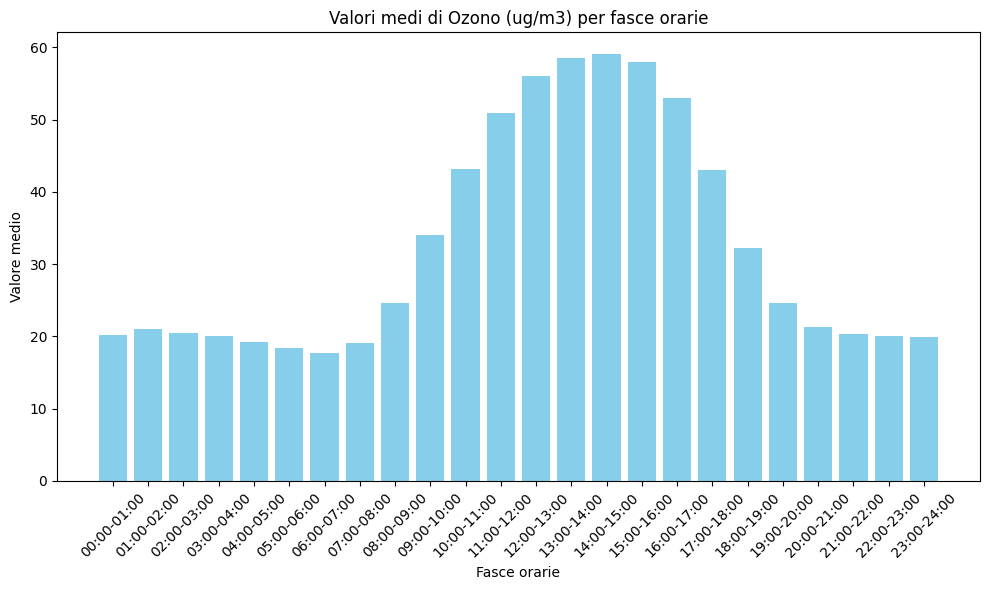

<ipython-input-11-ac756f95d3e4>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('Time Range')[column].mean()


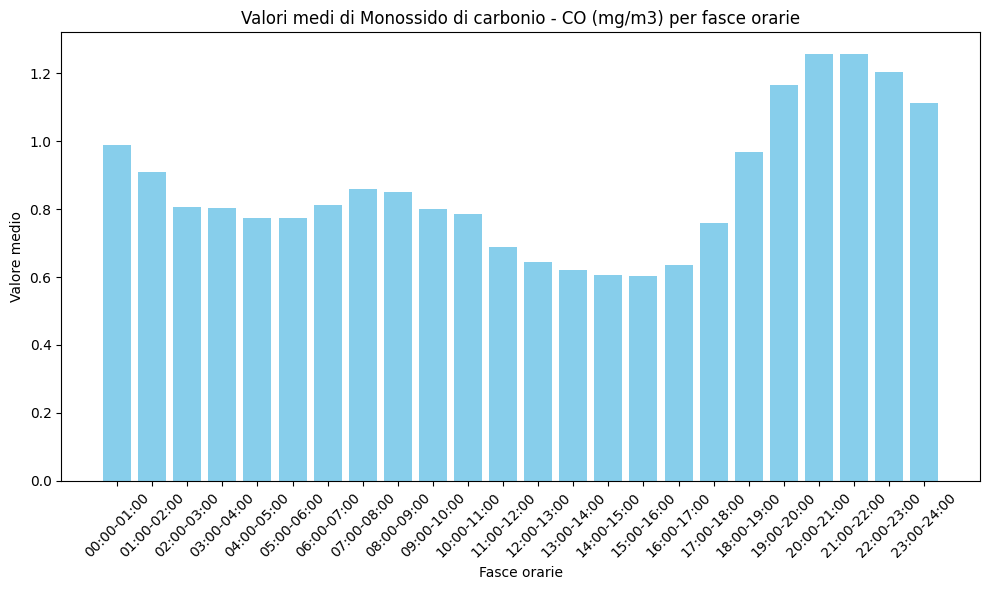

<ipython-input-11-ac756f95d3e4>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('Time Range')[column].mean()


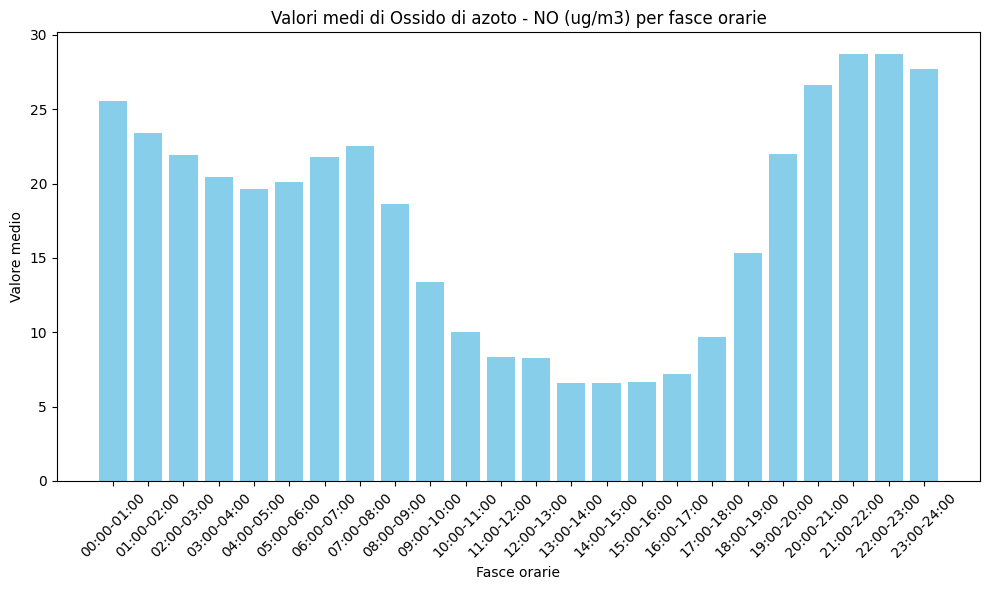

<ipython-input-11-ac756f95d3e4>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('Time Range')[column].mean()


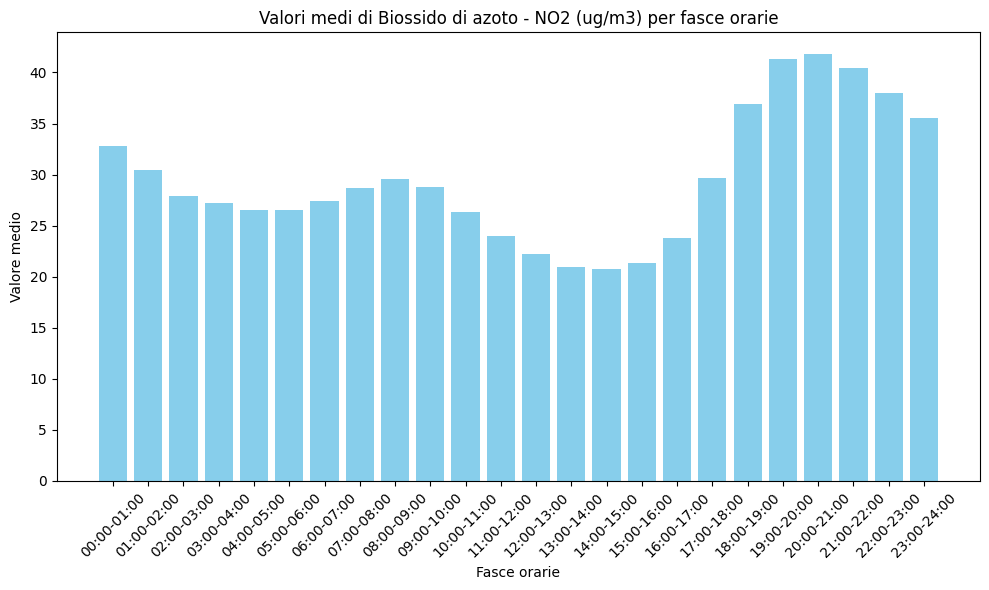

<ipython-input-11-ac756f95d3e4>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('Time Range')[column].mean()


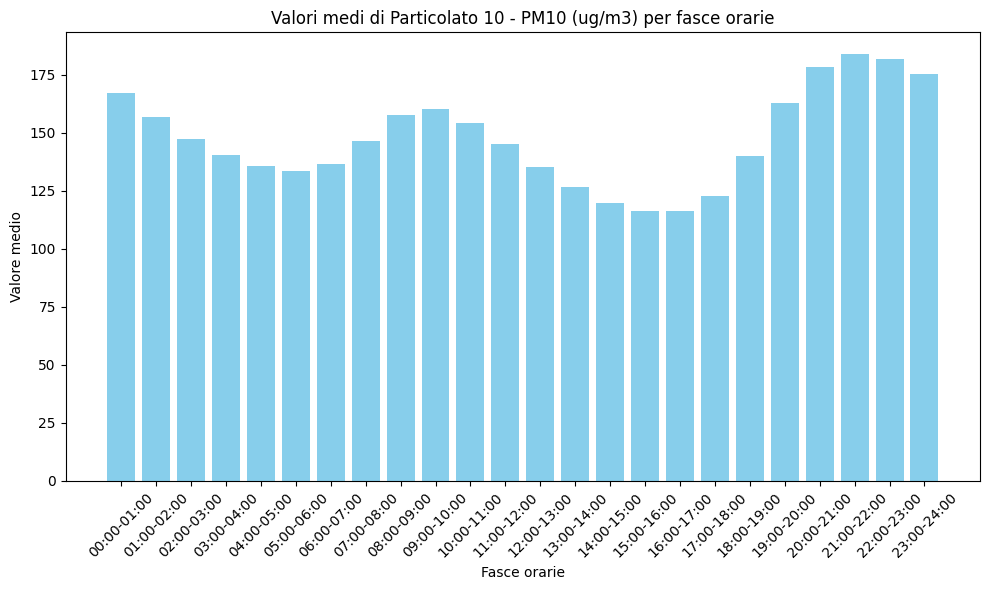

<ipython-input-11-ac756f95d3e4>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('Time Range')[column].mean()


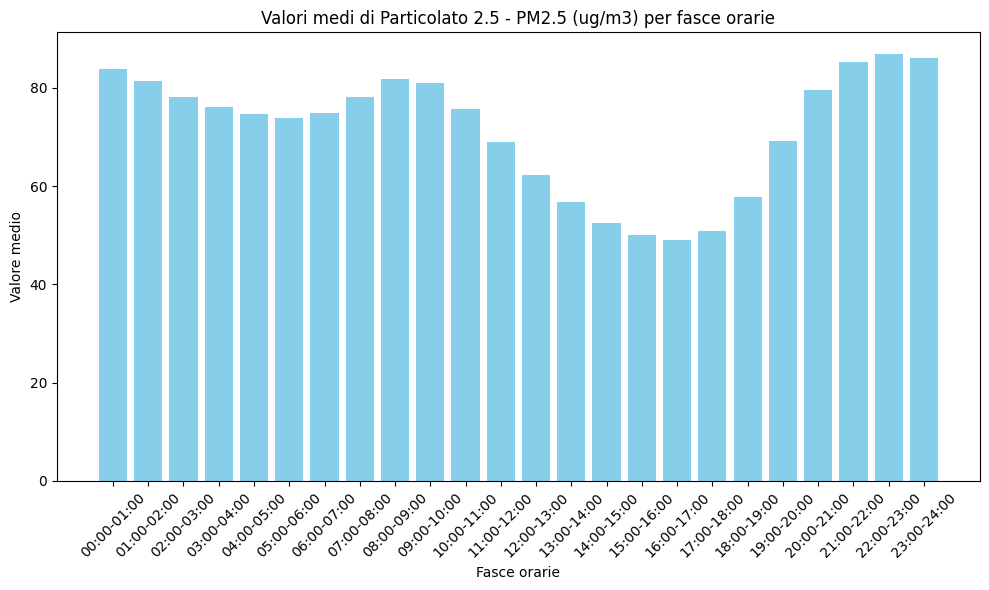

<ipython-input-11-ac756f95d3e4>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('Time Range')[column].mean()


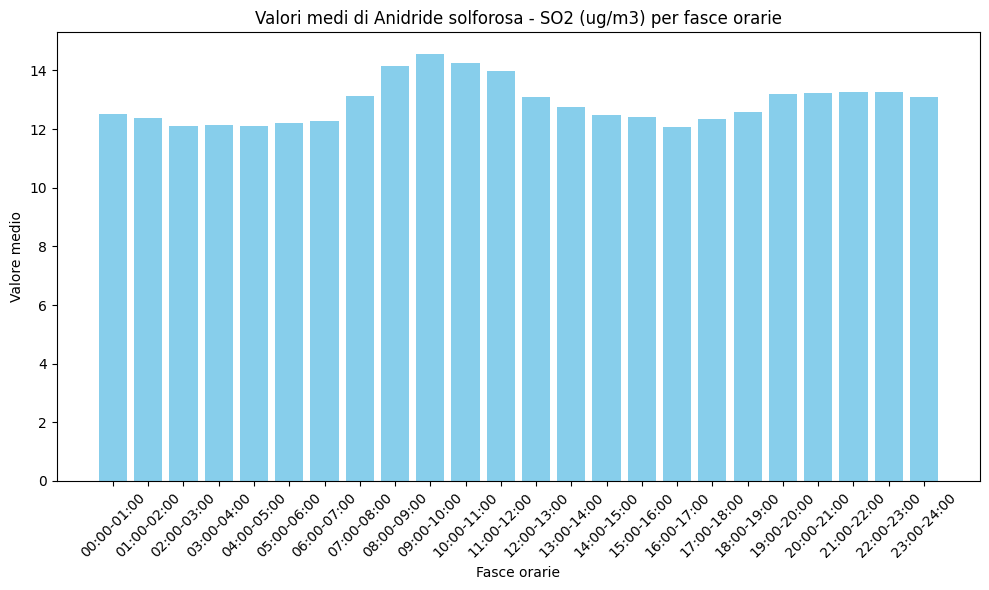

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset_filtered_and_joined.csv')
# Definizione delle fasce orarie
time_edges = ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00',
              '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '24:00']
# Calcolo delle medie
calculate_means_by_time_range(df, 'Ozone (ug/m3)', time_edges, 'Ozono (ug/m3)')
calculate_means_by_time_range(df, 'CO (mg/m3)', time_edges, 'Monossido di carbonio - CO (mg/m3)')
calculate_means_by_time_range(df, 'NO (ug/m3)', time_edges, 'Ossido di azoto - NO (ug/m3)')
calculate_means_by_time_range(df, 'NO2 (ug/m3)', time_edges, 'Biossido di azoto - NO2 (ug/m3)')
calculate_means_by_time_range(df, 'PM10 (ug/m3)', time_edges, 'Particolato 10 - PM10 (ug/m3)')
calculate_means_by_time_range(df, 'PM2.5 (ug/m3)', time_edges, 'Particolato 2.5 - PM2.5 (ug/m3)')
calculate_means_by_time_range(df, 'SO2 (ug/m3)', time_edges, 'Anidride solforosa - SO2 (ug/m3)')

###Sostituzione dei missing values relativi alle sostanze

In [ ]:
# Funzione per imputare valori mancanti pesando i valori della stessa ora nei giorni precedenti
def impute_same_hour(data, column, missing_index, decay, max_days):
    """
    Impute missing value using measurements from the same hour on previous days.

    Parameters:
    - data: pandas DataFrame filtered for a specific station.
    - column: Column name to impute.
    - missing_index: Index of the missing value to impute.
    - decay: Decay factor for weights (e.g., 0.1 for exponential decay).
    - max_days: Maximum number of previous days to consider.

    Returns:
    - Imputed value for the missing index.
    """
    target_hour = data.loc[missing_index].name.hour  # Corretto accesso all'indice
    previous_values = []
    weights = []

    for day_offset in range(1, max_days + 1):
        past_date = data.loc[missing_index].name - pd.Timedelta(days=day_offset)  # Usa l'indice temporale
        if past_date in data.index:
            value = data.loc[past_date, column]
            if not np.isnan(value):  # Usa solo valori non nulli
                previous_values.append(value)
                weights.append(np.exp(-decay * day_offset))  # Decadimento esponenziale

    if not previous_values:  # Nessun valore valido precedente
        return np.nan

    # Calcolo della media ponderata
    return np.dot(weights, previous_values) / sum(weights)

# Funzione per imputare una colonna rispettando i dati della stessa stazione
def impute_column_same_hour(data, column, decay, max_days):
    """
    Impute missing values for a specific column using the same-hour approach,
    filtering by station ('file_name').

    Parameters:
    - data: pandas DataFrame with a 'file_name' column to distinguish stations.
    - column: Column name to impute.
    - decay: Decay factor for weights.
    - max_days: Maximum number of previous days to consider.

    Returns:
    - DataFrame column with imputed values.
    """
    for station in data['file_name'].unique():  # Loop through each station
        station_data = data[data['file_name'] == station]
        for idx in station_data[station_data[column].isna()].index:
            data.loc[idx, column] = impute_same_hour(station_data, column, idx, decay, max_days)
    return data[column]


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset_filtered_and_joined.csv')

data['From Date'] = pd.to_datetime(data['From Date'])
data.set_index('From Date', inplace=True)

columns_to_impute = ['Ozone (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'CO (mg/m3)', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'SO2 (ug/m3)']
for column in columns_to_impute:
    data[column] = impute_column_same_hour(data, column, decay=0.2, max_days=3)

# Output del DataFrame dopo l'imputazione
data.to_csv('/content/drive/MyDrive/dataset_filled_values.csv')

##Suddivisione del dataset



Suddivisione del dataset in due tabelle:
*   Una tabella contenente le misurazioni relative alle concentrazioni delle sostanze e alle condizioni atmosferiche registrate dalle stazioni di Delhi
*   Una tabella contenente le misurazioni relative alle sole concentrazioni delle sostanze registrate da tutte le stazioni

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset_filled_values.csv')

#Creare il nuovo dataframe df1 rimuovendo una lista di colonne
colonne_da_rimuovere = ['AT (degree C)','BP (mmHg)','RF (mm)','RH (%)', 'SR (W/mt2)', 'WD (deg)', 'WS (m/s)']
dataframe_sostanze = df.drop(columns=colonne_da_rimuovere)
dataframe_sostanze.to_csv('/content/drive/MyDrive/dataset_sostanze.csv')

#Creare il nuovo dataframe df2 rimuovendo quelle righe il cui valore del campo 'file_name' non inizia con 'DL'
dataframe_delhi_con_cond_atmosferiche = df[df['file_name'].str.startswith('DL', na=False)]
dataframe_delhi_con_cond_atmosferiche.to_csv('/content/drive/MyDrive/dataset_delhi_con_cond_atmosferiche.csv')

In [ ]:
print(dataframe_sostanze.columns)
print(dataframe_delhi_con_cond_atmosferiche.columns)

Index(['From Date', 'file_name', 'CO (mg/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)',
       'Ozone (ug/m3)', 'PM10 (ug/m3)', 'PM2.5 (ug/m3)', 'SO2 (ug/m3)',
       'To Date', 'VWS (m/s)', 'state', 'city', 'start_month_num',
       'start_year'],
      dtype='object')
Index(['From Date', 'file_name', 'AT (degree C)', 'BP (mmHg)', 'CO (mg/m3)',
       'NO (ug/m3)', 'NO2 (ug/m3)', 'Ozone (ug/m3)', 'PM10 (ug/m3)',
       'PM2.5 (ug/m3)', 'RF (mm)', 'RH (%)', 'SO2 (ug/m3)', 'SR (W/mt2)',
       'To Date', 'VWS (m/s)', 'WD (deg)', 'WS (m/s)', 'state', 'city',
       'start_month_num', 'start_year'],
      dtype='object')


##Analisi e sostituzione missing values relativi alle condizioni atmosferiche

Sostituzione dei missing values relativi alle condizioni atmosferiche nelle stazioni di Delhi

In [ ]:
def fill_missing_values(df, time_col, group_col, fields):
    for field in fields:
        # Crea una tabella pivot con la media dei valori raggruppati per time_col e group_col
        group_means = (
            df.groupby([time_col, group_col])[field]
            .mean()
            .unstack(fill_value=np.nan)  # Otteniamo una tabella con group_col come colonne
        )

        # Calcola la media delle altre stazioni (escludendo quella corrente)
        row_means = group_means.apply(lambda row: row.mean(skipna=True), axis=1)

        # Funzione per calcolare i valori sostitutivi
        def get_filled_value(row):
            if pd.isna(row[field]):
                # Ottieni la media pre-calcolata per il timestamp corrente, escludendo il gruppo corrente
                return row_means.get(row[time_col], np.nan)
            return row[field]

        # Applica il calcolo con un approccio vettorializzato
        df[field] = df.apply(lambda row: get_filled_value(row), axis=1)

    return df

In [ ]:
# Leggi il dataset
df = pd.read_csv("/content/drive/MyDrive/dataset_delhi_con_cond_atmosferiche.csv")

# Assicurati che la colonna 'From Date' sia di tipo datetime
df['From Date'] = pd.to_datetime(df['From Date'])

# Lista dei campi atmosferici
atmospheric_fields = ['AT (degree C)','BP (mmHg)','RF (mm)','RH (%)', 'SR (W/mt2)', 'WD (deg)', 'WS (m/s)']

# Applica la funzione al dataset
df = fill_missing_values(df, 'From Date', 'file_name', atmospheric_fields)

# Salva il dataset aggiornato
df.to_csv("/content/drive/MyDrive/dataset_delhi_con_cond_atmosferiche2.csv", index=False)

<ipython-input-9-3a1024b98cee>:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.isnull().mean() * 100)


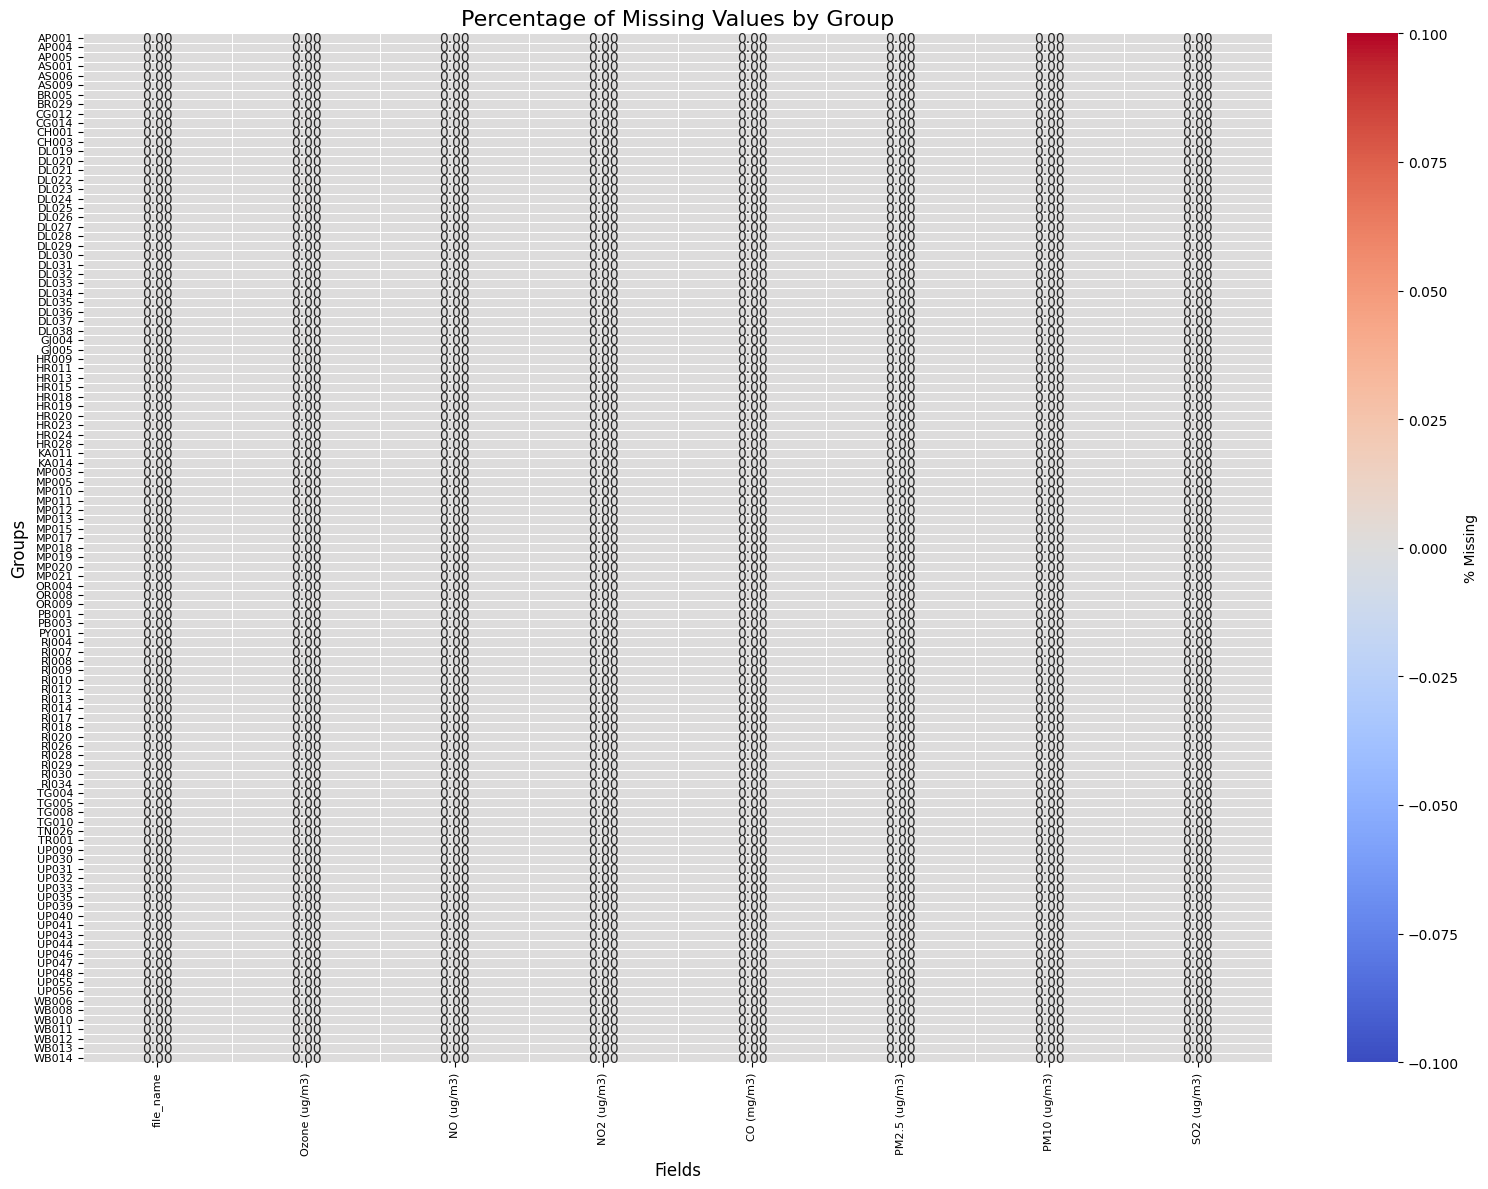

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset_solo_sostanze.csv')
plot_missing_values_heatmap(df, group_field='file_name', fields=['Ozone (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'CO (mg/m3)', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'SO2 (ug/m3)'])

<ipython-input-65-05a28d2488e3>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['missing_group'] = (df['is_missing'] & ~df['is_missing'].shift(1).fillna(False)).cumsum()


    file_name  missing_group  missing_length   category
0       DL019              1               8   7-12 ore
1       DL019              2               1    1-6 ore
2       DL019              3              20  13-24 ore
3       DL019              4               1    1-6 ore
4       DL019              5               1    1-6 ore
..        ...            ...             ...        ...
115     DL038            116               1    1-6 ore
116     DL038            117              20  13-24 ore
117     DL038            118               1    1-6 ore
118     DL038            119               1    1-6 ore
119     DL038            120              13  13-24 ore

[120 rows x 4 columns]


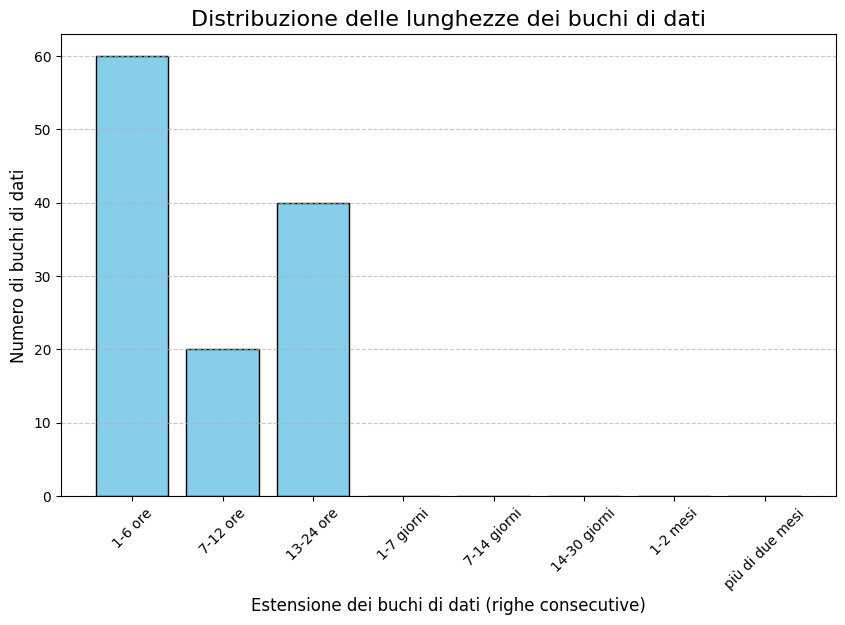

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset_delhi_con_cond_atmosferiche.csv')

# Ordinare il dataframe per stazione e timestamp
df = df.sort_values(by=["file_name", "From Date"]).reset_index(drop=True)

# Creare una colonna per identificare i valori mancanti
df['is_missing'] = df['RF (mm)'].isna()

# Creare un identificatore per gruppi consecutivi di valori mancanti
df['missing_group'] = (df['is_missing'] & ~df['is_missing'].shift(1).fillna(False)).cumsum()

# Calcolare la lunghezza di ogni buco di dati per stazione
missing_lengths = (
    df[df['is_missing']]
    .groupby(['file_name', 'missing_group'])
    .size()
    .reset_index(name='missing_length')
)

# Definire i range delle categorie
bins = [0, 6, 12, 24, 168, 336, 720, 1440, np.inf]  # Aggiungere il valore iniziale 0
labels = ["1-6 ore", "7-12 ore", "13-24 ore", "1-7 giorni", "7-14 giorni", "14-30 giorni", "1-2 mesi", "più di due mesi"]

# Classificare i buchi di dati nelle categorie
missing_lengths['category'] = pd.cut(
    missing_lengths['missing_length'], bins=bins, labels=labels, right=False
)

print(missing_lengths)

# Contare il numero di buchi per ciascuna categoria
distribution = missing_lengths['category'].value_counts(sort=False).reset_index()
distribution.columns = ['category', 'count']

# Creare l'istogramma
plt.figure(figsize=(10, 6))
plt.bar(distribution['category'], distribution['count'], color='skyblue', edgecolor='black')
plt.title("Distribuzione delle lunghezze dei buchi di dati", fontsize=16)
plt.xlabel("Estensione dei buchi di dati (righe consecutive)", fontsize=12)
plt.ylabel("Numero di buchi di dati", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

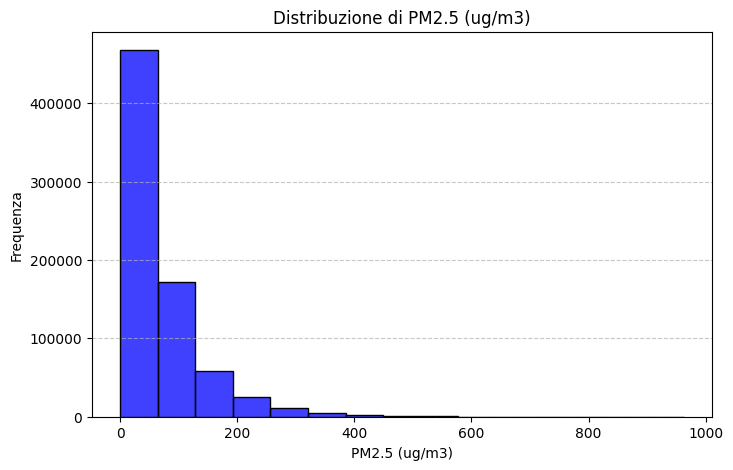

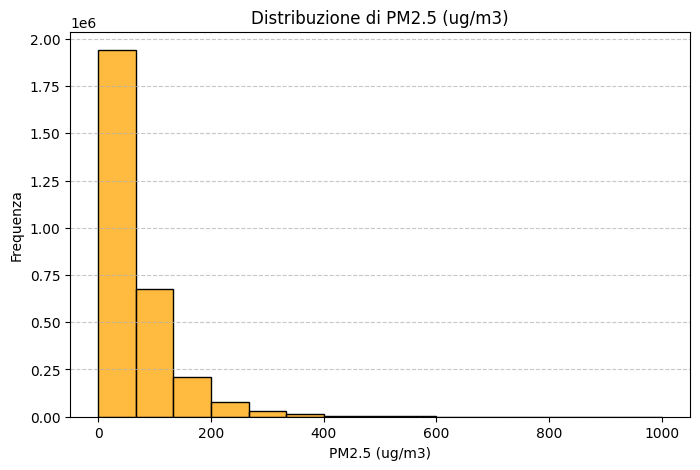

In [ ]:
df_dh = pd.read_csv('/content/drive/MyDrive/dataset_delhi_con_cond_atmosferiche.csv')
df_so = pd.read_csv('/content/drive/MyDrive/dataset_sostanze.csv')
col = 'PM2.5 (ug/m3)'
#'NO (ug/m3)', 'NO2 (ug/m3)', 'Ozone (ug/m3)', 'PM10 (ug/m3)', 'PM2.5 (ug/m3)', 'SO2 (ug/m3)']
# 'AT (degree C)','BP (mmHg)','RF (mm)','RH (%)', 'SR (W/mt2)', 'WD (deg)', 'WS (m/s)'

plt.figure(figsize=(8, 5))  # Imposta la dimensione della figura
sns.histplot(df_dh[col], kde=False, bins=15, color='blue')  # Usa kde=True per aggiungere la curva di densità
plt.title(f'Distribuzione di {col}')
plt.xlabel(col)
plt.ylabel('Frequenza')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8, 5))  # Imposta la dimensione della figura
sns.histplot(df_so[col], kde=False, bins=15, color='orange')  # Usa kde=True per aggiungere la curva di densità
plt.title(f'Distribuzione di {col}')
plt.xlabel(col)
plt.ylabel('Frequenza')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Filtraggio che mantiene solamente i dati registrati dal 2019 in avanti, in modo da evitare di avere un buco di diversi mesi relativo alle precipitazioni

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset_delhi_con_cond_atmosferiche2.csv')

# Assicurati che il campo 'From Date' sia nel formato datetime
df['From Date'] = pd.to_datetime(df['From Date'])

# Filtra le righe con anno >= 2019
df = df[df['From Date'].dt.year >= 2019]

df.to_csv("/content/drive/MyDrive/dataset_delhi_con_cond_atmosferiche.csv", index=False)